The purpose of this notebook is specifically to test the model's prediction created in `P2G7_aumedi_wibisana.ipynb`. The images sample used to test came from Russo-Ukrainian war itself.

In [13]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
from google.colab import drive

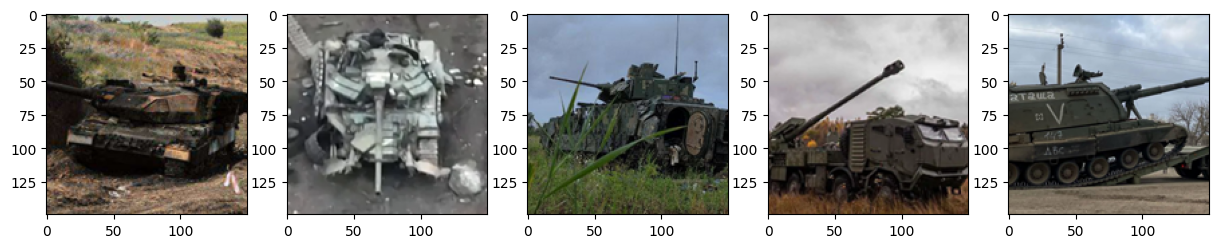

In [5]:
# Load the inference images

imgInf1 = mpimg.imread('imgInf1.png')
imgInf2 = mpimg.imread('imgInf2.png')
imgInf3 = mpimg.imread('imgInf3.png')
imgInf4 = mpimg.imread('imgInf4.png')
imgInf5 = mpimg.imread('imgInf5.png')

infArray = [imgInf1, imgInf2, imgInf3, imgInf4, imgInf5]

plt.figure(figsize=(15,5))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(infArray[i])

plt.show()

These images are (from left to right): Leopard 2A6 (`tanks`), T64BV (`tanks`), M2 Bradley (`Infantry fighting vehicles`), 2S22 Boghdana (`Self-propelled artillery`), and MSTA-B (`Self-propelled artillery`).

In [9]:
# Load model dari Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
model = load_model('/content/drive/My Drive/MLModel/model.h5')

Model is loaded. Here we create a function to ease the use of the model.

In [14]:
def prediction(file):
  img = tf.keras.utils.load_img(file, target_size=(150, 150))
  x = tf.keras.utils.img_to_array(img)/255

  plt.imshow(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  idx = np.argmax(classes)
  clas = ['Anti-aircraft','Armored combat support vehicles','Armored personnel carriers',
          'Infantry fighting vehicles','Light armored vehicles','Mine-protected vehicles',
          'Prime movers and trucks', 'Self-propelled artillery', 'light utility vehicles',
          'tanks']
  print('This is a {}'.format(clas[idx]))

The testing is done below.

1/1 [==============================] - 0s 312ms/step
This is a Mine-protected vehicles


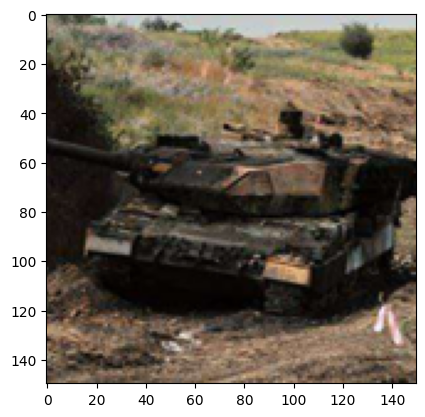

In [15]:
prediction('imgInf1.png')

1/1 [==============================] - 0s 63ms/step
This is a Mine-protected vehicles


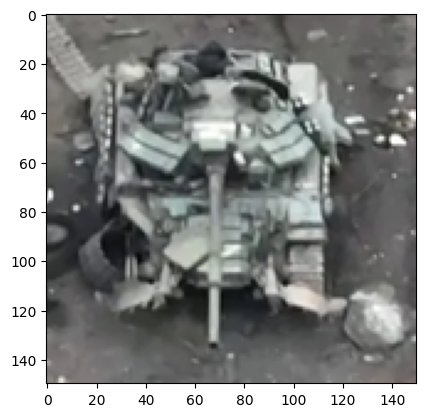

In [16]:
prediction('imgInf2.png')

1/1 [==============================] - 0s 36ms/step
This is a Mine-protected vehicles


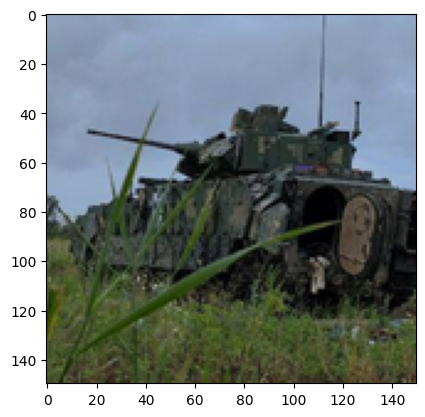

In [17]:
prediction('imgInf3.png')

1/1 [==============================] - 0s 112ms/step
This is a Mine-protected vehicles


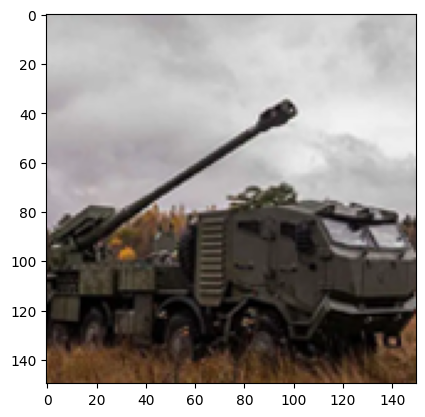

In [18]:
prediction('imgInf4.png')

1/1 [==============================] - 0s 36ms/step
This is a Infantry fighting vehicles


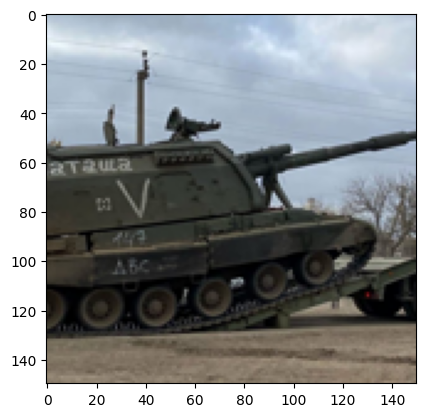

In [19]:
prediction('imgInf5.png')